In [1]:
def throwlist_generator(numberflips):
    
    result=[]
    
    for i in range(numberflips):
        
        coin=np.random.uniform(0,1)
        
        if coin<0.5:
            result.append('head')
        if coin>0.5:
            result.append('tails')
    
    return(result)


def consecutive_counter(numberflips):
    
    result=throwlist_generator(numberflips)
    consecutive=1
    consecutivelist=[]
    
    for i in range(numberflips-1):  
        
        if result[i]==result[i+1]:
            consecutive=consecutive+1
        else:
            consecutivelist.append(int(consecutive))
            consecutive=1
            
    if consecutive!=1:
        consecutivelist.append(int(consecutive))
    
    return(consecutivelist)

In [2]:
'''optimised by integration of throws and analysis of successive outcomes.
This makes a list of outcomes obsolete and only the number of successions is generated.'''

def consecutive_outcome_generator(numberflips):
    
    outcomelist=[]
    result=[]
    H=0
    T=0
    
    for i in range(numberflips):
        
        coin=np.random.uniform(0,1)
        
        if coin>0.5:
            if T!=0:
                result.append(T)
                T=0
            H=H+1
            
        if coin<0.5:
            if H!=0:
                result.append(H)
                H=0
            T=T+1
            
    if H!=0:
        result.append(H)
    if T!=0:
        result.append(T)
        
    return(result)

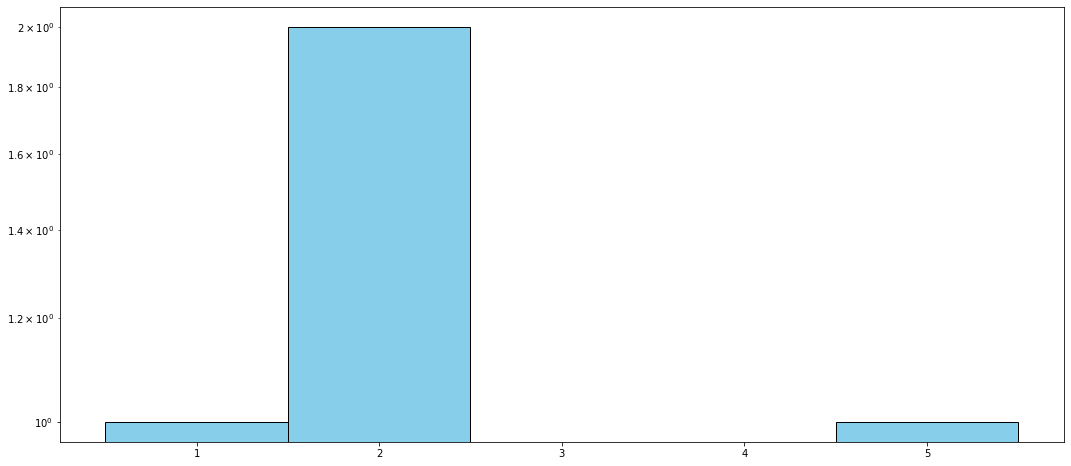

In [25]:
import numpy as np
import matplotlib.pyplot as plt

numberflips=10

data=consecutive_outcome_generator(numberflips)
#data=consecutive_counter(numberflips)

plt.figure(figsize=[18,8])

bins=[x+n for n in range(np.min(data),np.max(data)+1) for x in [0, 1]]+[np.max(data)+1]
ticks=plt.xticks(range(np.min(data),np.max(data)+1))

plt.hist(data, bins, #range=[1,10],
         histtype='bar', align='left',
         orientation='vertical', log=True, color='skyblue', ec='black', lw=1)
plt.show()

785 ns ± 62.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.18 µs ± 103 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
0
0.6674343880000291
2.54 s ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.73 s ± 139 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
500000
0.9316913723911158
5.02 s ± 54.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.42 s ± 257 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1000000
0.9275022859729448
7.54 s ± 75.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.02 s ± 559 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1500000
0.9406207623401249
9.86 s ± 291 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.9 s ± 1 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
2000000
0.9067674272981892
13.5 s ± 1.4 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
12.8 s ± 570 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2500000
1.052401098166979
14.5 s ± 288 ms per loop (me

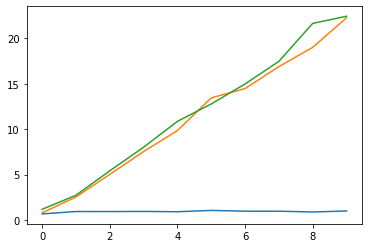

In [59]:
'''This evaluates the running times of both scripts'''
import statistics
import matplotlib.pyplot as plt

timelist=[]
timings1list=[]
timings2list=[]

numberflips=0

for i in range(10):
    
    t1=%timeit -o consecutive_outcome_generator(numberflips)
    t2=%timeit -o data=consecutive_counter(numberflips)

    timings1=statistics.mean(t1.all_runs)
    timings2=statistics.mean(t2.all_runs)
    
    timings1list.append(timings1)
    timings2list.append(timings2)
    
    ratio=timings1/timings2
    
    timelist.append(ratio)
    
    print(numberflips)
    print(ratio)
    
    numberflips=numberflips+500000
    
plt.plot(timelist)
plt.plot(timings1list)
plt.plot(timings2list)
plt.show()


In [8]:
'''Use more two coins! For this generate the outcome for two coins. 
MAYHAPS with only one list and use neighboring throws.'''
def dual_outcome_generator(numberflips):
    
    list1=[]
    list2=[]
    
    for i in range(numberflips):
        
        coin1=np.random.uniform(0,1)        
        if coin1<0.5:
            list1.append('head')
        if coin1>0.5:
            list1.append('tails')
        
        coin2=np.random.uniform(0,1)
        if coin2<0.5:
            list2.append('head')
        if coin2>0.5:
            list2.append('tails')
    
    return(list1, list2)